In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('capmetro_UT.csv')
df['total_ridership'] = df['boarding'] + df['alighting']
df.head()

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend,total_ridership
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend,1
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend,3
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend,7
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend,7
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend,6


#### Adding a column called 'Total Ridership'. It is the sum of the number of passengers boarding and alighting in an interval


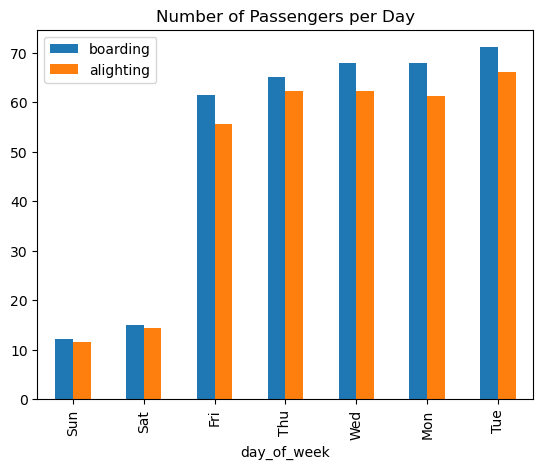

In [42]:
day_of_week=df.groupby('day_of_week')[['boarding', 'alighting']].agg('mean')
day_of_week_sort=day_of_week.sort_values(by='boarding', ascending=True)
day_of_week_sort.plot(kind='bar')
plt.title('Number of Passengers per Day')
plt.show()
#day_of_week_sort.head()

#### From the chart it shows that more number of people board the bus than deboard. It is probably because people commute back from UT via their own means of transport

Text(0.5, 1.0, 'Passengers boarding/alighting at UT')

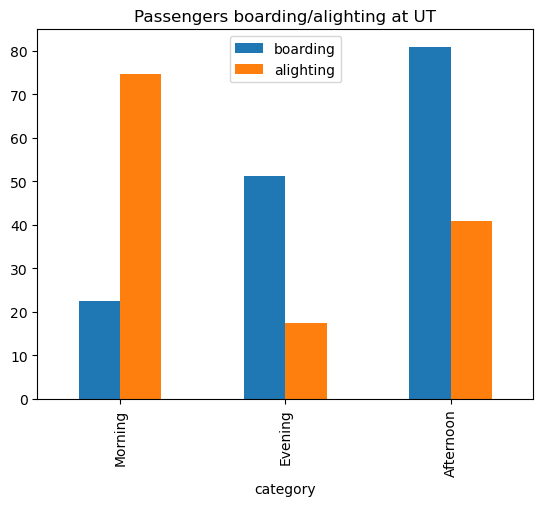

In [44]:
def categorize_hour(hour):
    if 1 <= hour < 6:
        return 'Midnight'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour <= 24:
        return 'Evening'
        
df['category']=df['hour_of_day'].apply(categorize_hour)


time=df.groupby('category')[['boarding','alighting']].agg('mean')
time_sort=time.sort_values(by ='boarding',ascending=True)
time_sort.plot(kind='bar')

plt.title('Passengers boarding/alighting at UT')

#### This graph shows that there are more people getting off around the UT campus in the morning and more people getting on the bus in the evening and afternoon. 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4144\1229266394.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['day_of_week'] = pd.Categorical(filtered_df['day_of_week'], categories=days_order, ordered=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4144\1229266394.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(filtered_df.pivot_table(index='hour_of_day', columns='day_of_week', values='boarding', aggfunc='mean'),
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4144\1229266394.py:18: FutureWarning: The default value of observed=False is deprecated and wil

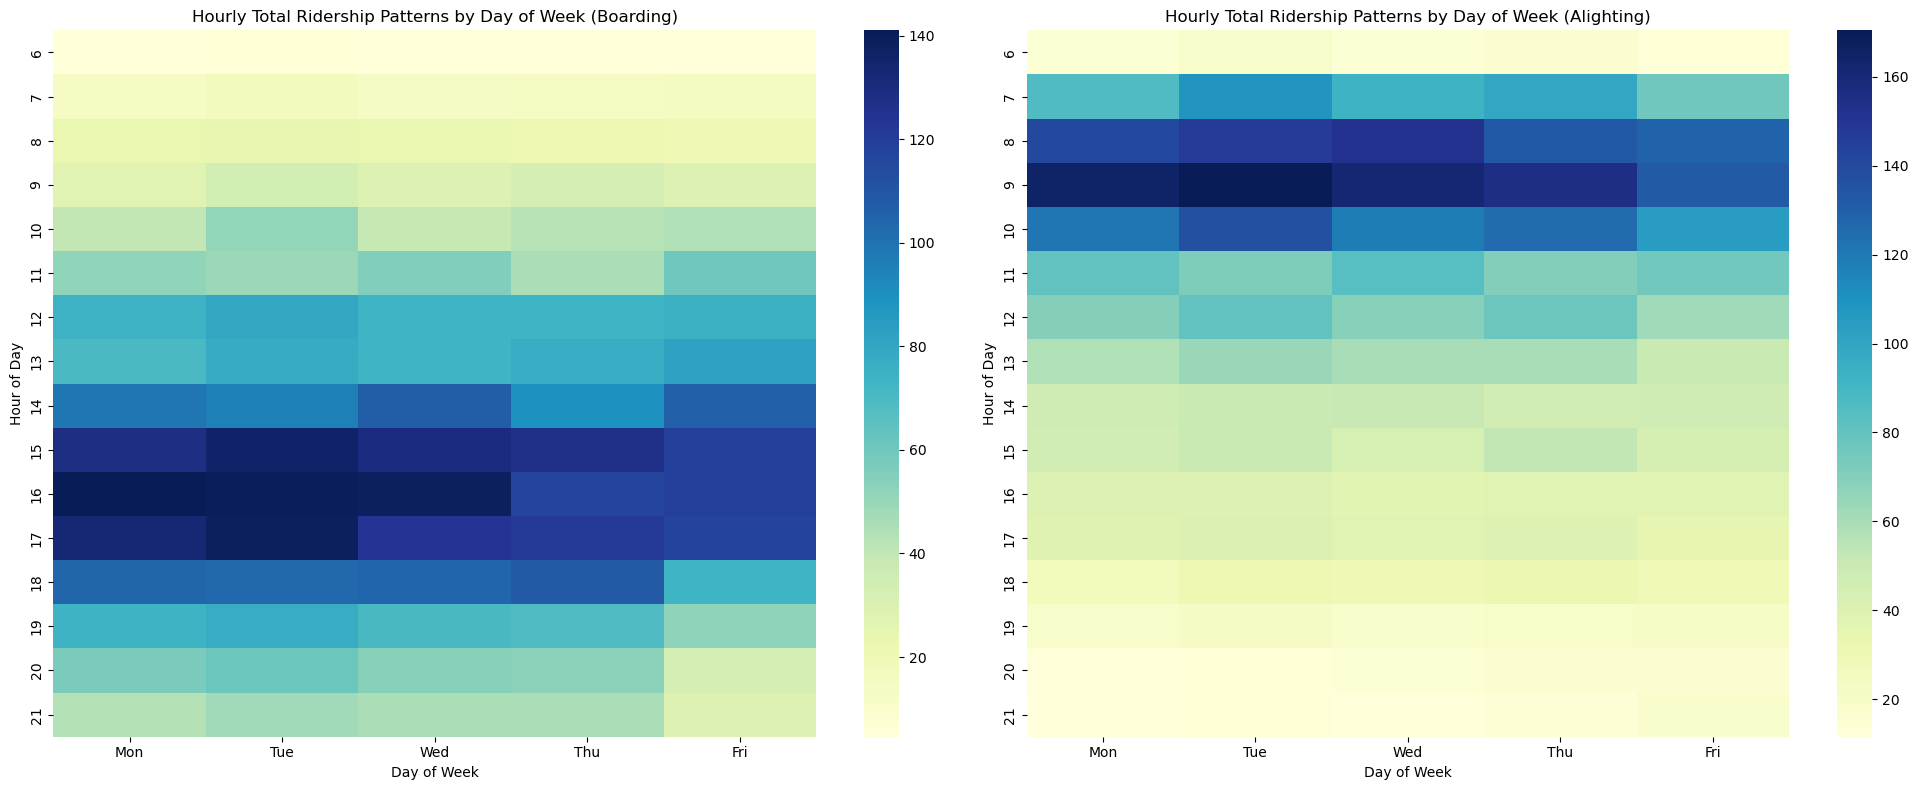

In [53]:
# Define the correct order for the days of the week
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Filter out weekends and sort by the day order
filtered_df = df[~df['day_of_week'].isin(['Sat', 'Sun'])]
filtered_df['day_of_week'] = pd.Categorical(filtered_df['day_of_week'], categories=days_order, ordered=True)
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot the first heatmap for 'boarding'
sns.heatmap(filtered_df.pivot_table(index='hour_of_day', columns='day_of_week', values='boarding', aggfunc='mean'),
            cmap='YlGnBu', annot=False, ax=axes[0])
axes[0].set_title('Hourly Total Ridership Patterns by Day of Week (Boarding)')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Hour of Day')

# Plot the second heatmap for 'alighting'
sns.heatmap(filtered_df.pivot_table(index='hour_of_day', columns='day_of_week', values='alighting', aggfunc='mean'),
            cmap='YlGnBu', annot=False, ax=axes[1])
axes[1].set_title('Hourly Total Ridership Patterns by Day of Week (Alighting)')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Hour of Day')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



#### This graph shows you the peak hours which is typically from 9AM to 6PM. Also shows you that the boarding patterns are more prominent in the evening and alighting patterns are more prominent in the morning as expected. Another interesting point is that the bus in non operational between 9 PM and 6 AM

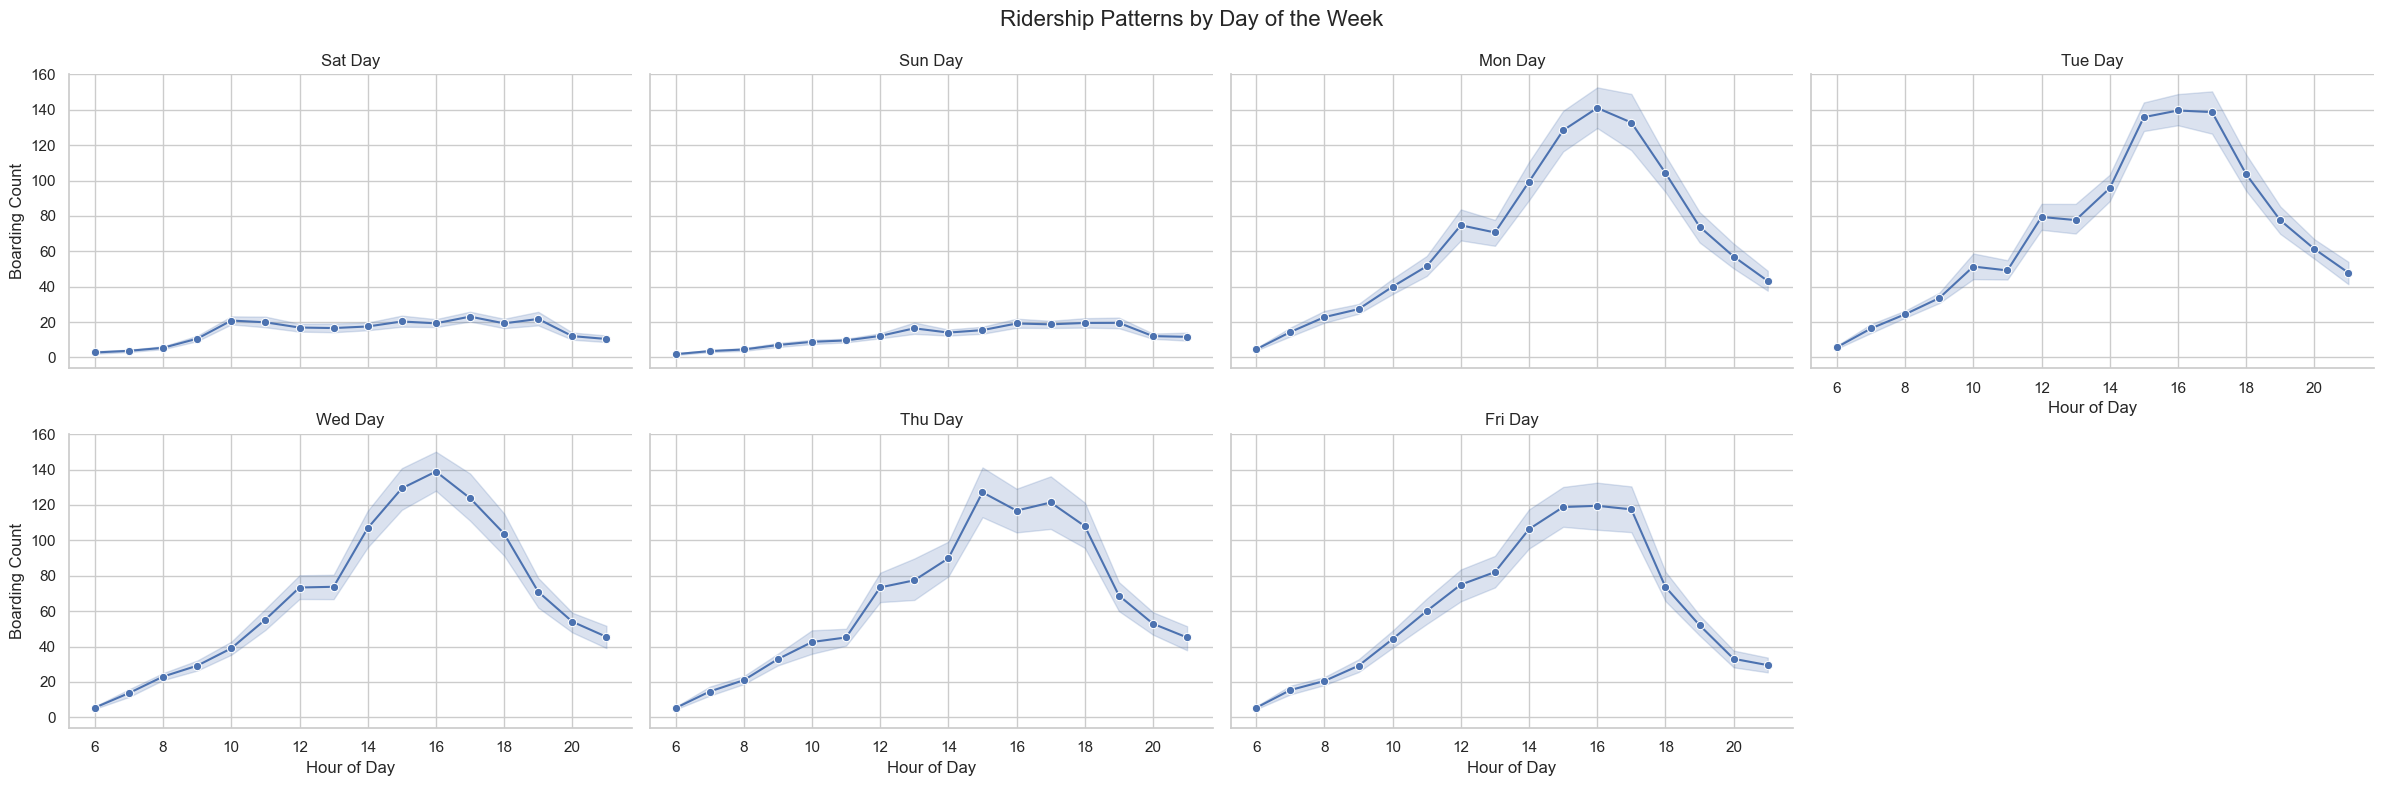

In [86]:

# Convert timestamp to a datetime object (if needed)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Example of faceting: Boarding counts by hour of the day across different days of the week
sns.set(style="whitegrid")

# Create a faceted plot
g = sns.FacetGrid(df, col="day_of_week", col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot, "hour_of_day", "boarding", marker="o")

# Add titles and labels
g.set_axis_labels("Hour of Day", "Boarding Count")
g.set_titles("{col_name} Day")
g.fig.suptitle("Ridership Patterns by Day of the Week", fontsize=16)

# Adjust layout
g.tight_layout()
g.fig.subplots_adjust(top=0.9)  

plt.show()


#### This graph shows you the baording pattern across the 7 days and hours. The heaviest traffic on campus is in the afternoon/evening on the weeekdays. 


In [65]:
bins = [0, 65, 75, 100]
labels = ['< 65', '65 to 75', '> 75']
df['temperature2'] = pd.cut(df['temperature'], bins=bins, labels=labels, right=False)

# Step 3: Group the data and calculate averages and sums
grouped = df.groupby('temperature2').agg({
    'boarding': ['mean', 'sum'],
    'alighting': ['mean', 'sum']
}).reset_index()

# Step 4: Rename columns for clarity
grouped.columns = ['temperature2', 'Average of boarding', 'Sum of boarding', 
                   'Average of alighting', 'Sum of alighting']

# Step 5: Convert the sums to percentages
total_boarding = grouped['Sum of boarding'].sum()
total_alighting = grouped['Sum of alighting'].sum()

grouped['Sum of boarding'] = (grouped['Sum of boarding'] / total_boarding * 100).round(2).astype(str) + '%'
grouped['Sum of alighting'] = (grouped['Sum of alighting'] / total_alighting * 100).round(2).astype(str) + '%'

# Display the final table
print(grouped)
plot(d

  temperature2  Average of boarding Sum of boarding  Average of alighting  \
0         < 65            45.265038          32.11%             50.682331   
1     65 to 75            41.729669          18.47%             47.884789   
2         > 75            62.611064          49.42%             44.784206   

  Sum of alighting  
0           38.87%  
1           22.92%  
2           38.22%  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4144\2104343670.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('temperature2').agg({


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4144\200740830.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temperature2', y='Average of boarding', data=grouped, palette='muted')


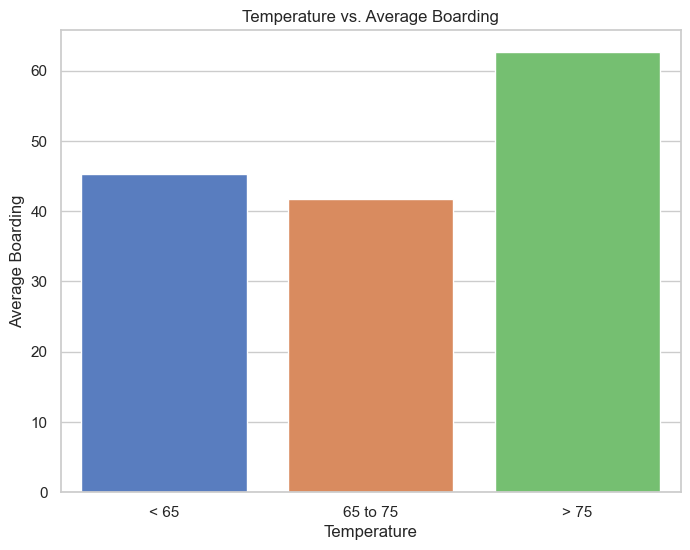

In [71]:
# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='temperature2', y='Average of boarding', data=grouped, palette='muted')

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Average Boarding')
plt.title('Temperature vs. Average Boarding')

# Show the plot
plt.show()


#### The table above and the graph below represents the ridership patterns at different temperatures (divided into 3 buckets).